In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv("all_stocks_5yr.csv")

# Extract the relevant features
# Create a new column for the target and initialize it with 0
df['target'] = 0

# Define a function to compare close values and assign the target value
def compare_close_values(group):
    group['target'] = (group['close'].shift(-1) > group['close']).astype(int)
    return group

# Apply the function to each group within the DataFrame
df = df.groupby('Name', group_keys=False).apply(compare_close_values)

df.dropna(inplace=True)

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Print the resulting dataset with the target column
features = df[['open', 'high', 'low', 'close', 'volume']]
target = df['target']

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, shuffle=False)

In [5]:
# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [10]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
15476/15476 [==============================] - 20s 1ms/step - loss: 0.6924 - accuracy: 0.5204
Epoch 2/100
15476/15476 [==============================] - 19s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 3/100
15476/15476 [==============================] - 19s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 4/100
15476/15476 [==============================] - 18s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 5/100
15476/15476 [==============================] - 18s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 6/100
15476/15476 [==============================] - 18s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 7/100
15476/15476 [==============================] - 18s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 8/100
15476/15476 [==============================] - 19s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 9/100
15476/15476 [==============================] - 18s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 10/100
15476/15476 [====================

15476/15476 [==============================] - 19s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 78/100
15476/15476 [==============================] - 18s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 79/100
15476/15476 [==============================] - 18s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 80/100
15476/15476 [==============================] - 18s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 81/100
15476/15476 [==============================] - 18s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 82/100
15476/15476 [==============================] - 19s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 83/100
15476/15476 [==============================] - 18s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 84/100
15476/15476 [==============================] - 19s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 85/100
15476/15476 [==============================] - 19s 1ms/step - loss: 0.6923 - accuracy: 0.5204
Epoch 86/100
15476/15476 [========================

In [6]:
# model = load_model('RNN_4feature_1_model.h5')

2023-06-06 16:09:17.624062: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

3869/3869 [==============================] - 3s 673us/step - loss: 0.6921 - accuracy: 0.5228
Test Loss: 0.6921271085739136
Test Accuracy: 0.5228260159492493


In [11]:
# model.save("RNN_4feature_1_model.h5")

In [17]:
loss, accuracy = Trained_model_1.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

3869/3869 [==============================] - 2s 597us/step
Accuracy: 0.5228260342794372
Confusion Matrix:
[[    0 59077]
 [    0 64729]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     59077
           1       0.52      1.00      0.69     64729

    accuracy                           0.52    123806
   macro avg       0.26      0.50      0.34    123806
weighted avg       0.27      0.52      0.36    123806



/Users/behdadfeilizadeh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/behdadfeilizadeh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/behdadfeilizadeh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

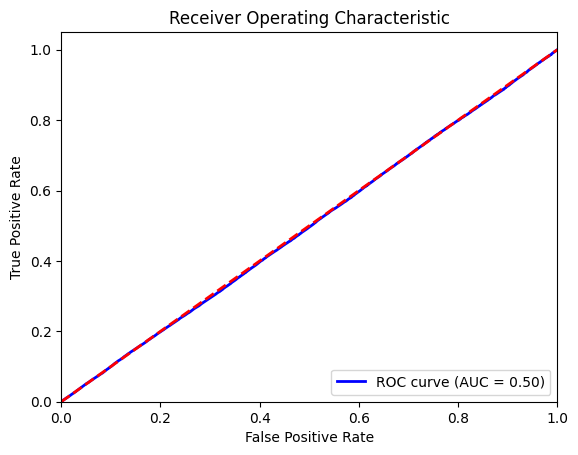

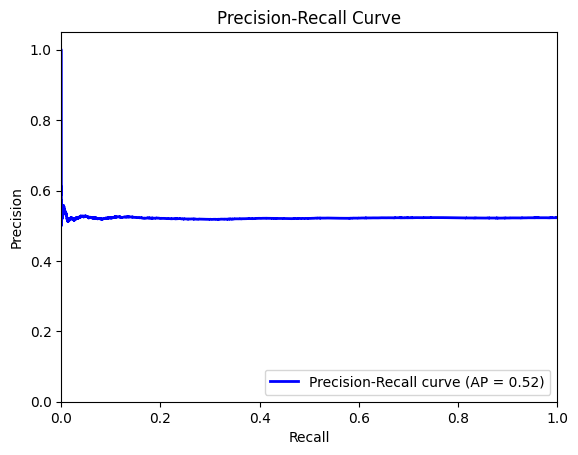

In [14]:


#Obtain predicted probabilities for positive class (class 1)
# X_test_4_feat = X_test[:, :, :4]
y_prob = model.predict(X_test)[:, 0]

# Convert probabilities to binary predictions (0 or 1)
y_pred = np.where(y_prob > 0.5, 1, 0)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


In [15]:
mse = mean_squared_error(y_test, y_prob)
rmse = mean_squared_error(y_test, y_prob, squared=False)
r2 = r2_score(y_test, y_prob)
mae = mean_absolute_error(y_test, y_prob)
print("MSE: ", mse)
print("R2: ", r2)
print("RMSE:", rmse)
print("MAE:", mae)

MSE:  0.24949042053528747
R2:  -4.5889142938460026e-05
RMSE: 0.49949016059907275
MAE: 0.49904181018088734


## Parameter Tuning

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_model(units=50, activation='relu', optimizer='adam', loss='binary_crossentropy'):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(1, X_train.shape[2])))
    model.add(Dense(units=1, activation=activation))
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

In [ ]:
param_grid = {
    'units': [50, 100, 200],  # Number of LSTM units
    'batch_size': [32, 64, 128],  # Batch size
    'epochs': [25, 50, 100],  # Number of epochs
    'activation': ['relu', 'sigmoid', 'tanh'],  # Activation functions to try
    'optimizer': ['SGD', 'RMSprop', 'Adam'],  # Optimizers to try
    'loss': ['binary_crossentropy', 'mean_squared_error', 'hinge']
}

# Create the model
model = KerasClassifier(build_fn=create_model)

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# Get the best hyperparameters
best_params = grid_result.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_result.best_estimator_.model
print("Best Model Architecture:")
best_model.summary()